<a href="https://colab.research.google.com/github/andr3w1699/Intelligent_System_for_Pattern_Recognition/blob/main/FirstAssignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First ISPR Assignement: Signal Processing, Assignement number 2
# Author: Andrea Lepori


Assignement 2:

Consider the following dataset: https://www.kaggle.com/datasets/imsparsh/single-chestmounted-accelerometer

It contains accellerometer timeseries for 15 participants performing 7 different physical activities.

For this assignement focus on a single participant (of your choice) and study its 7 different activities using the Continous Wavelet Decomposition (CWD) approach discussed during the lectures. It suffices to compare the CWD visually and report you considerations on similarities and differences between the activities.

Note: you need to run the CDW separately for each accelerator channel. You can choose the wavelet family you prefer more (at random is also ok). In Python you may want to use Pywavelets or in Matlab the bundled Wavelet Toolbox (or you can use any other language and library that makes sense to you, but for this assignment I strongly advise Matlab).

In [ ]:
# install PyWavelets
!pip install PyWavelets

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
data_partecipant_1 = files.upload()

Saving 1.csv to 1 (1).csv


In [ ]:
import os
os.listdir()  # Mostra i file presenti nella cartella corrente

['.config', '1 (1).csv', '1.csv', 'sample_data']

In [ ]:
df = pd.read_csv("1.csv", header=None, names=["Timestamp", "acc_x", "acc_y", "acc_z", "Activity"])
df.head()  # Mostra le prime righe

,Timestamp,acc_x,acc_y,acc_z,Activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162501 entries, 0 to 162500
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  162501 non-null  float64
 1   acc_x      162501 non-null  int64  
 2   acc_y      162501 non-null  int64  
 3   acc_z      162501 non-null  int64  
 4   Activity   162501 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 6.2 MB


In [ ]:
df["Activity"].unique()


array([1, 2, 3, 4, 5, 6, 7, 0])

In [ ]:
activity_counts = df["Activity"].value_counts()
print(activity_counts)

Activity
7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
0        1
Name: count, dtype: int64


In [ ]:
# remove record with activity equal to 0 since there is only one
df = df[df["Activity"] != 0]
df["Activity"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
# Define accelerometer channels
channels = ['acc_x', 'acc_y', 'acc_z']

# Define activities
activities = df['Activity'].unique()

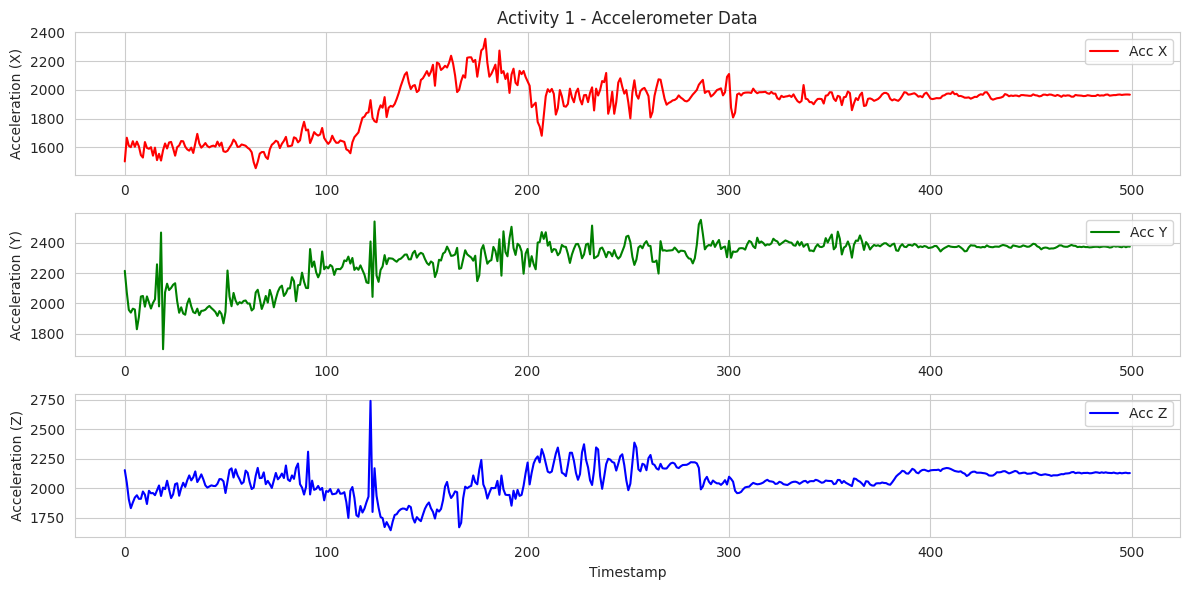

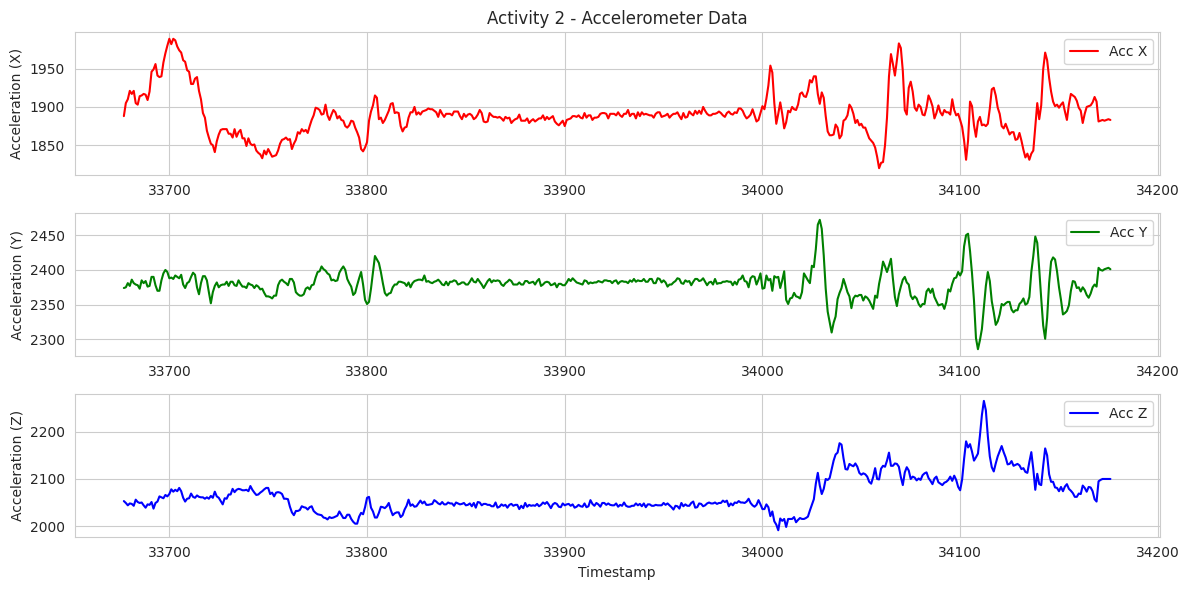

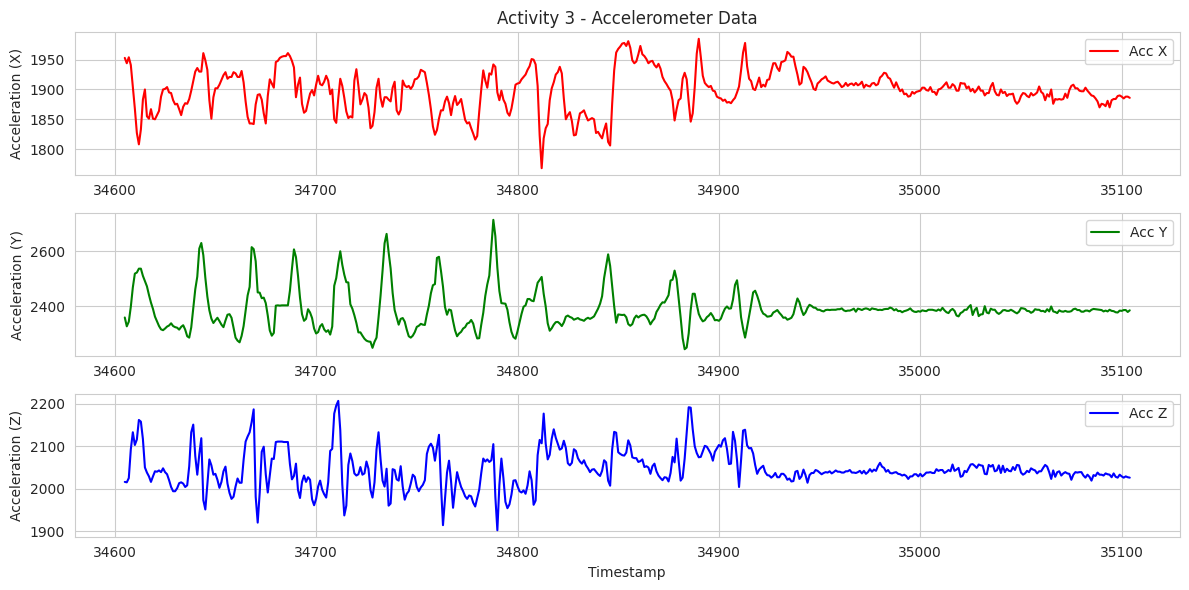

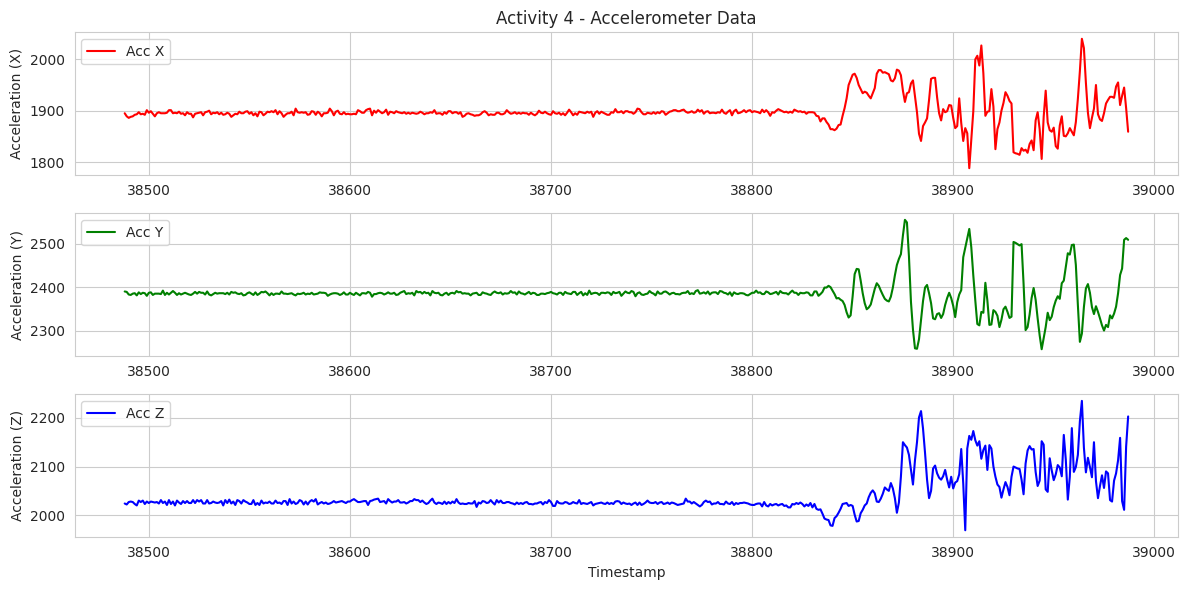

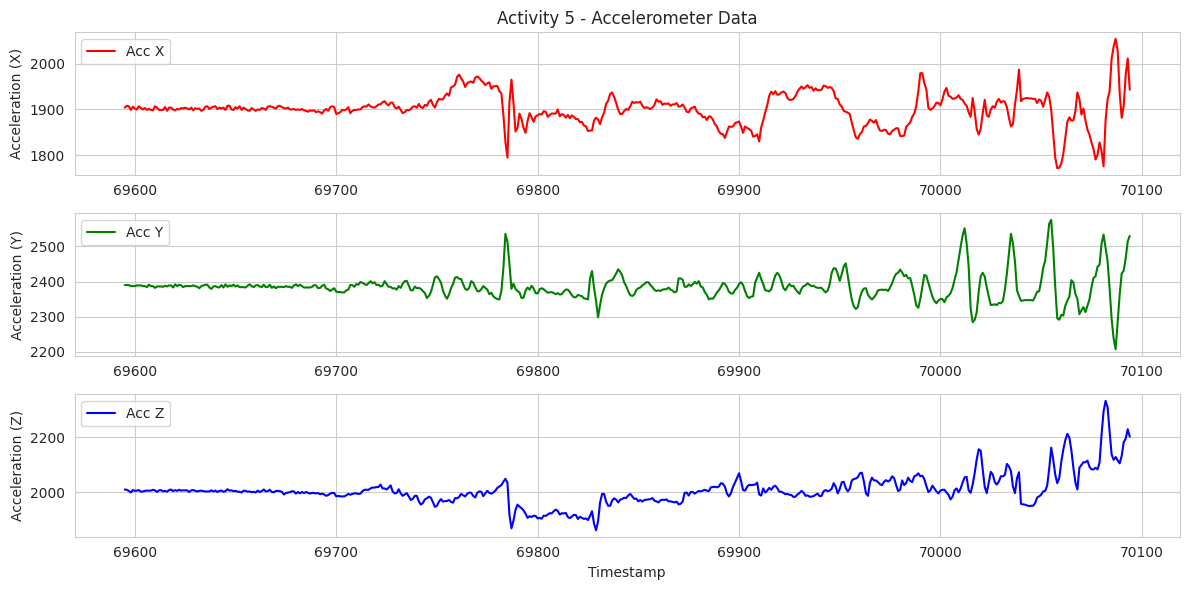

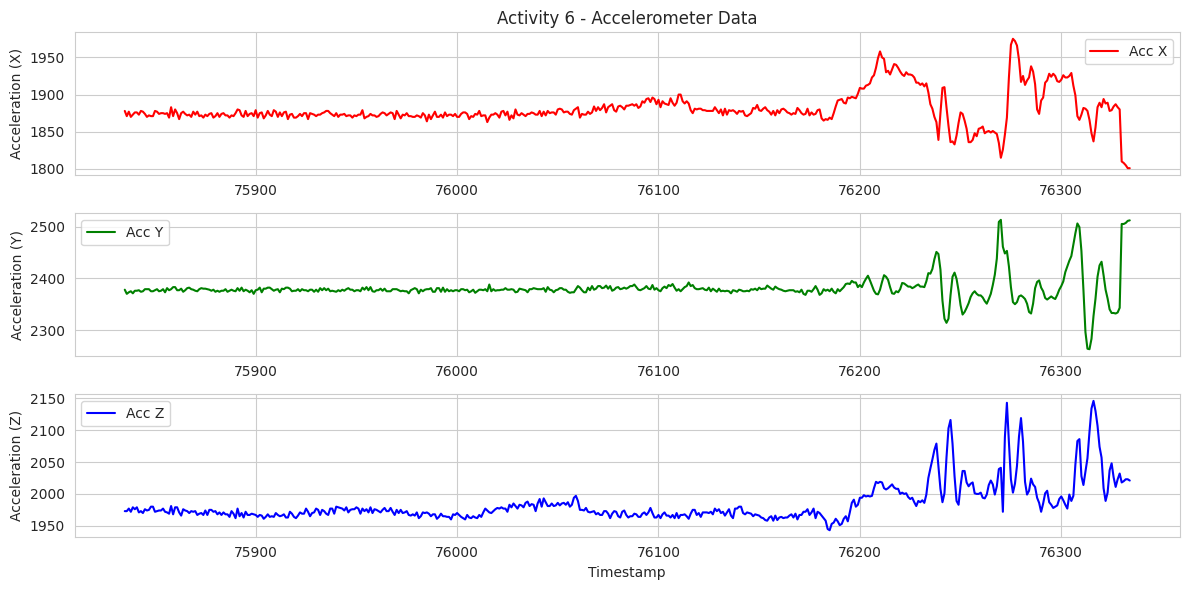

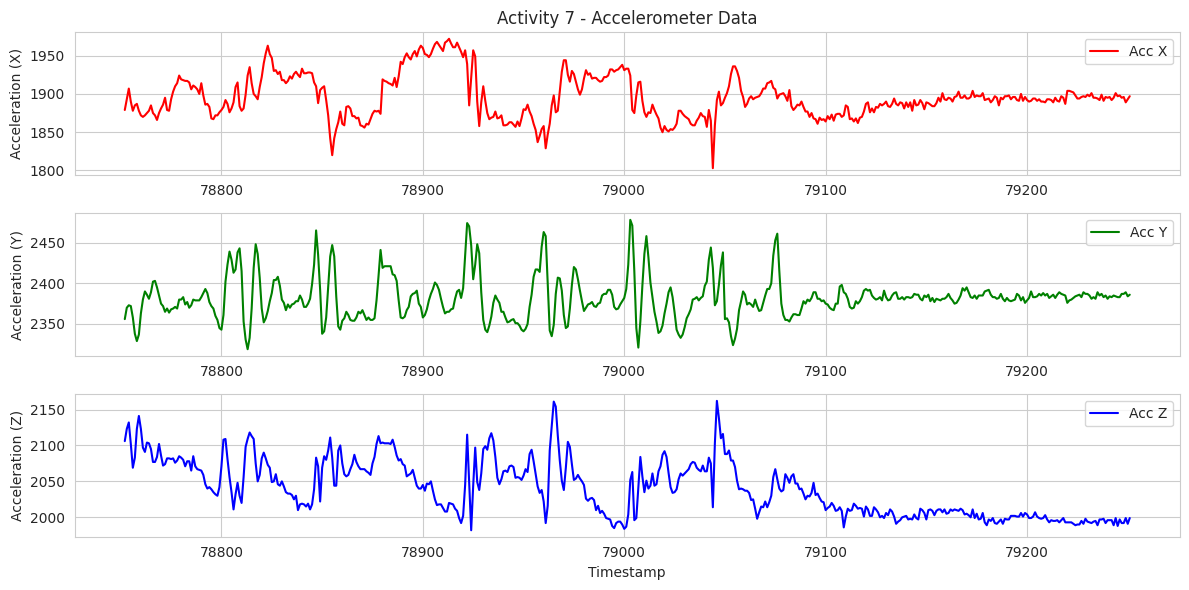

In [ ]:
# Define a fixed time window
time_window = 500  # Number of samples to visualize per activity

# Set plot style
sns.set_style("whitegrid")

# Create plots for each activity
for act in activities:
    plt.figure(figsize=(12, 6))

    # Extract data for the current activity
    df_act = df[df["Activity"] == act].head(time_window)  # Select first `time_window` samples

    # Plot acc_x
    plt.subplot(3, 1, 1)
    plt.plot(df_act["Timestamp"], df_act["acc_x"], color="r", label="Acc X")
    plt.title(f"Activity {act} - Accelerometer Data")
    plt.ylabel("Acceleration (X)")
    plt.legend()

    # Plot acc_y
    plt.subplot(3, 1, 2)
    plt.plot(df_act["Timestamp"], df_act["acc_y"], color="g", label="Acc Y")
    plt.ylabel("Acceleration (Y)")
    plt.legend()

    # Plot acc_z
    plt.subplot(3, 1, 3)
    plt.plot(df_act["Timestamp"], df_act["acc_z"], color="b", label="Acc Z")
    plt.xlabel("Timestamp")
    plt.ylabel("Acceleration (Z)")
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

## Augmented Dickey-Fuller (ADF) Test
The ADF test checks if a time series has a unit root (which indicates non-stationarity):

*   Null hypothesis (H_0​): The series is non-stationary.
*   Alternative hypothesis (H_1): The series is stationary.



*    If the p-value < 0.05, we reject H_0 and conclude the series is stationary.
*    If the p-value ≥ 0.05, we fail to reject H_0 and the series is likely non-stationary.




In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, series_name):
    result = adfuller(series, autolag="AIC")
    p_value = result[1]  # Get p-value
    print(f"ADF Test for {series_name}: p-value = {p_value:.5f}")

    if p_value < 0.05:
        print(f"✅ {series_name} is likely **stationary**.")
    else:
        print(f"❌ {series_name} is likely **non-stationary**.")

In [ ]:
for act in activities:
  df_act = df[df["Activity"] == act].head(time_window)
  check_stationarity(df_act["acc_x"], f"Acceleration X, Activity:{act}")
  check_stationarity(df_act["acc_y"], f"Acceleration Y, Activity:{act}")
  check_stationarity(df_act["acc_z"], f"Acceleration Y, Activity:{act}")


ADF Test for Acceleration X, Activity:1: p-value = 0.36588
❌ Acceleration X, Activity:1 is likely **non-stationary**.
ADF Test for Acceleration Y, Activity:1: p-value = 0.13891
❌ Acceleration Y, Activity:1 is likely **non-stationary**.
ADF Test for Acceleration Y, Activity:1: p-value = 0.23288
❌ Acceleration Y, Activity:1 is likely **non-stationary**.
ADF Test for Acceleration X, Activity:2: p-value = 0.00002
✅ Acceleration X, Activity:2 is likely **stationary**.
ADF Test for Acceleration Y, Activity:2: p-value = 0.00000
✅ Acceleration Y, Activity:2 is likely **stationary**.
ADF Test for Acceleration Y, Activity:2: p-value = 0.14950
❌ Acceleration Y, Activity:2 is likely **non-stationary**.
ADF Test for Acceleration X, Activity:3: p-value = 0.00000
✅ Acceleration X, Activity:3 is likely **stationary**.
ADF Test for Acceleration Y, Activity:3: p-value = 0.00000
✅ Acceleration Y, Activity:3 is likely **stationary**.
ADF Test for Acceleration Y, Activity:3: p-value = 0.00000
✅ Acceleratio

# Rolling Statistics (Mean & Variance)

A weakly stationary time series should have constant mean over time  and constant variance over time.

We can plot the rolling mean & variance to visually assess stationarity.


# Introduction to CWT
> In simple terms, the Continuous Wavelet Transform is an analysis tool similar to the Fourier Transform, in that it takes a time-domain signal and returns the signal’s components in the frequency domain. However, in contrast to the Fourier Transform, the Continuous Wavelet Transform returns a two-dimensional result, providing information in the frequency- as well as in time-domain. Therefore, it is useful for periodic signals which change over time, such as audio, seismic signals and many others (see below for examples).

[pywavelets documentation](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html)

The *cwt* Function --> main function, which calculates the CWR of a one-dim signal.

pywt.cwt(data, scales, wavelet): One dim Continuous Wavelet Transform.
Params:

*   **data**: *array_like*, input signal;
*   **scales**: *array_like*, The wavelet scales to use. One can use `f = scale2frequency(wavelet, scale)/sampling_period` to determine what physical frequency, `f`. Here, `f` is in hertz when the `sampling_period` is given in seconds;
*   **wavelet**: Wavelet object or name of the wavelet to use

Returns:
*   coefs: *array_like*. Continuous wavelet transform of the input signal for the given scales and wavelet. The first axis of `coefs` corresponds to the scales. The remaining axes match the shape of `data`.
*   frequencies: *array_like*. If the unit of sampling period are seconds and given, then frequencies are in hertz. Otherwise, a sampling period of 1 is assumed.

Note: size of coefficients array depends on the length of the inout array and the length of the given scales





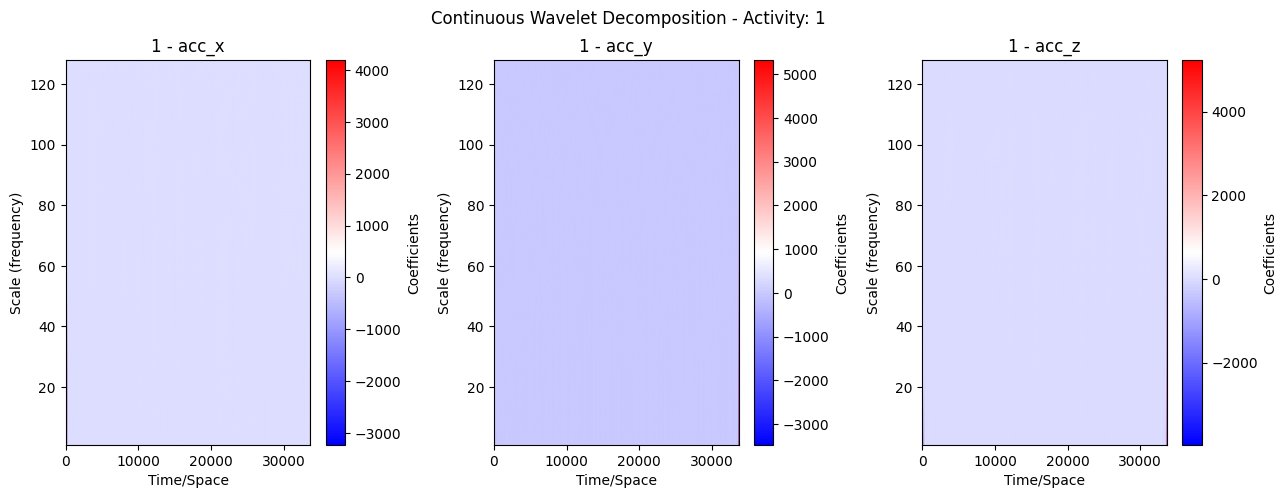

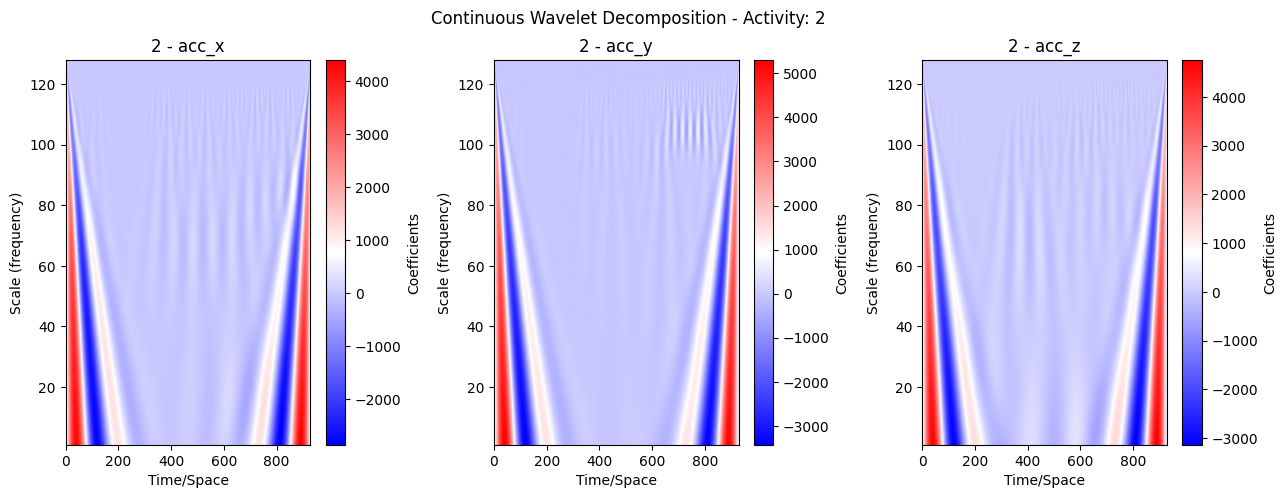

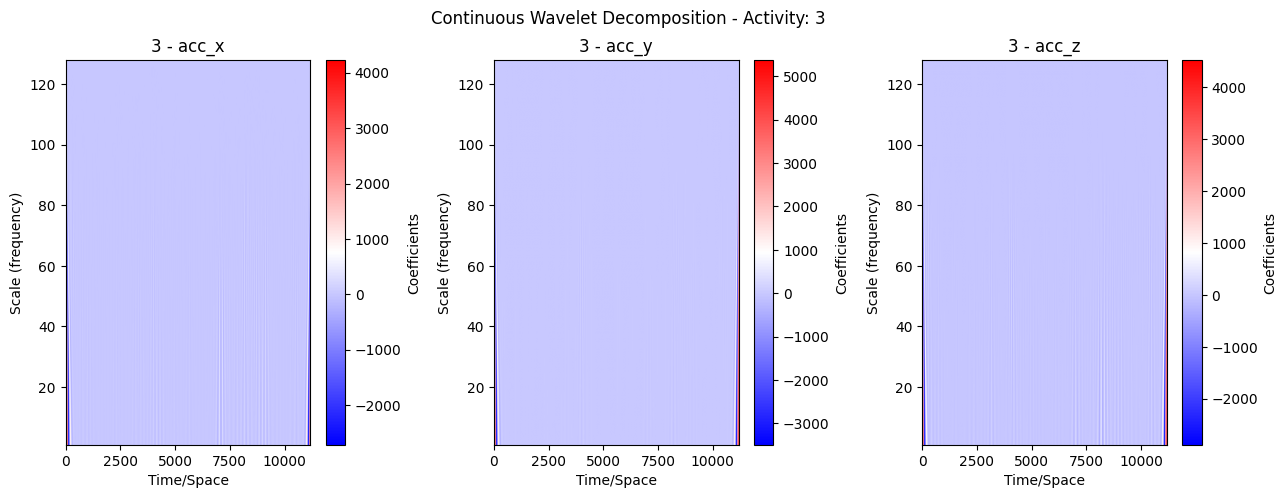

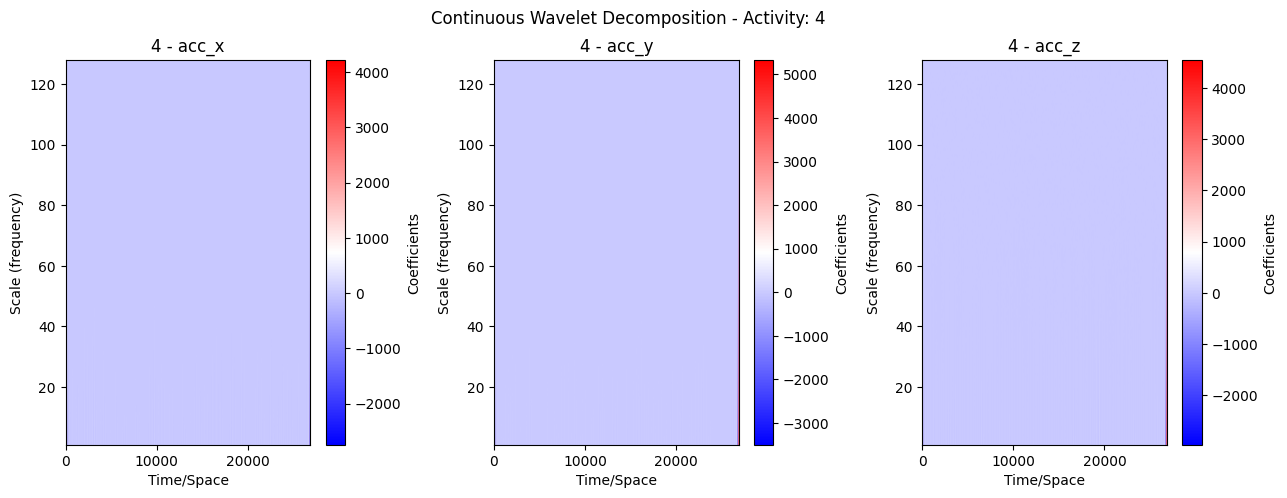

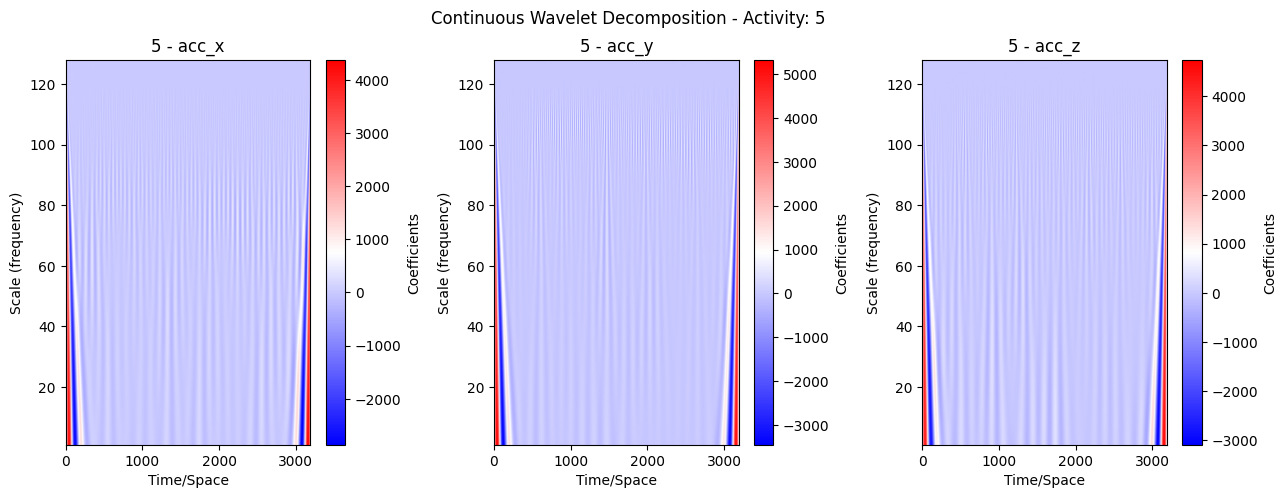

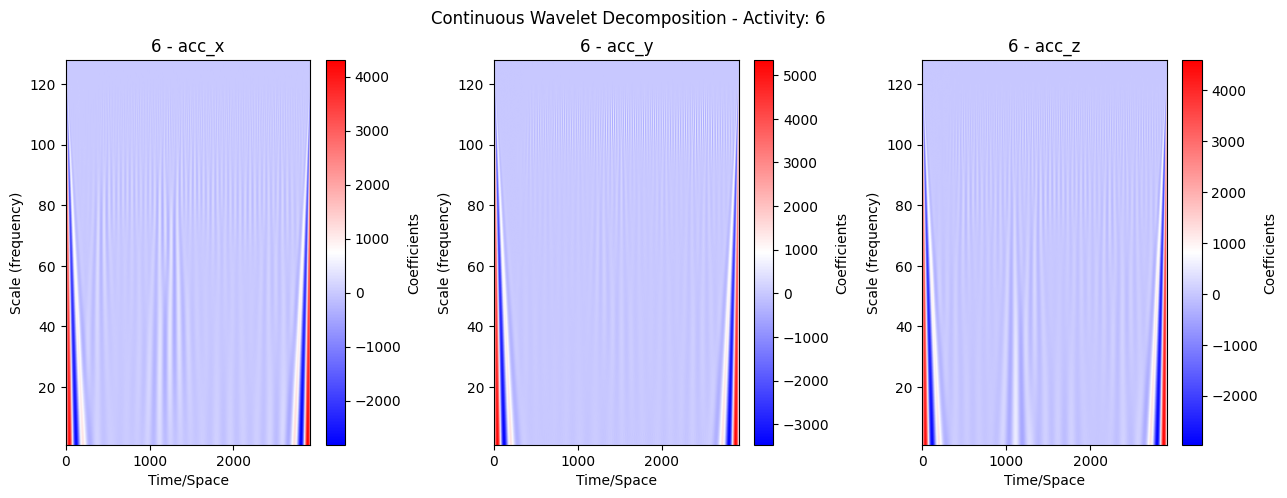

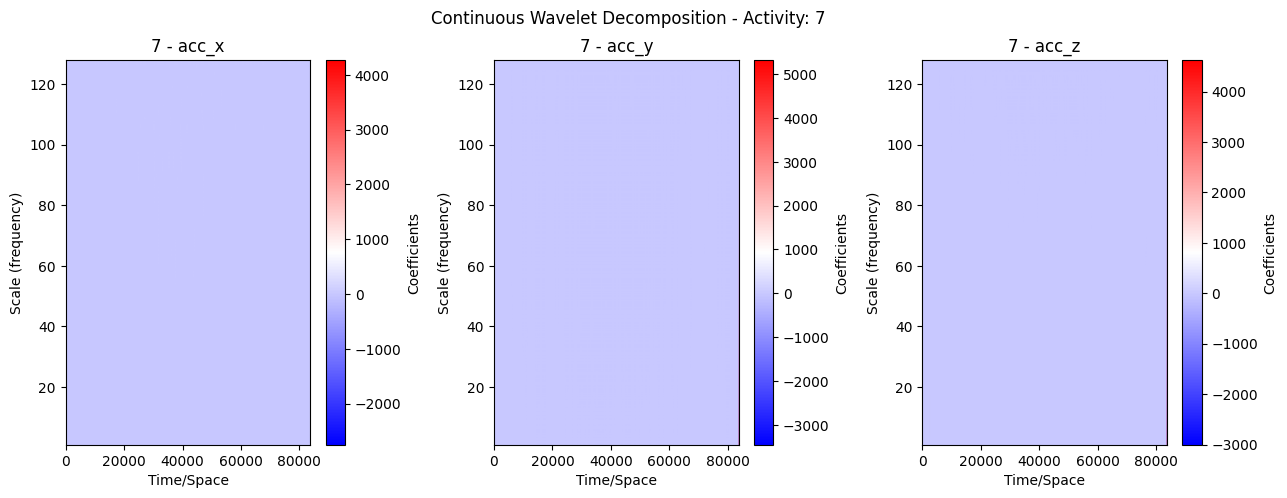

In [ ]:
# Define wavelet parameters
wavelet = 'morl'  # 'mexh' Mexican Hat wavelet, 'morl' Morlet Wavelet
scales = np.arange(1, 128)

# Plot CWD for each activity and accelerometer channel
# loop su ogni attività
for activity in activities:
    # filtra i dati per attività
    df_activity = df[df['Activity'] == activity]
    time_series = np.linspace(0, len(df_activity), len(df_activity))
    plt.figure(figsize=(15, 5))

    # loop su ogni canale dell'accelerometro
    for i, channel in enumerate(channels):
        # estraggo i dati di un canale
        signal = df_activity[channel].values
        # calcolo la CWT
        coefficients, frequencies = pywt.cwt(signal, scales, wavelet)

        # creazione del sottografico
        plt.subplot(1, 3, i+1)
        #sns.heatmap(np.abs(coefficients), cmap='viridis')
        #plt.title(f'{activity} - {channel}')
        #plt.xlabel('Time')
        #plt.ylabel('Scale')
        plt.imshow(coefficients, aspect="auto", extent=[0, len(signal), 1, 128], cmap="bwr")
        plt.colorbar(label="Coefficients")  # Aggiungi barra dei colori
        plt.title(f"{activity} - {channel}")
        plt.xlabel("Time/Space")
        plt.ylabel("Scale (frequency)")

    # Aggiungi spazio tra i grafici
    plt.subplots_adjust(wspace=0.4)  # Aumenta la distanza tra i subplot

    plt.suptitle(f'Continuous Wavelet Decomposition - Activity: {activity}')
    plt.show()

Continuous Wavelet Transform (CWT) applied to the 3 accelerometer signals (acc_x, acc_y, acc_z)  of a givent activity, 3 images for each of the 7 activity.
Wavelet Decomposition: The x-axis (Time/Space) represents the time progression of the signal. Time in this case. The y-axis (Scale/Frequency) represents the frequency content (higher scales correspond to lower frequencies). The color intensity (blue to red) represents the magnitude of the wavelet coefficients:
- Red regions indicate strong positive correlations at that scale.
- Blue regions indicate strong negative correlations.
- Light blue/white regions suggest low activity or neutral values.

Concentrating on activity 2:
- General Observations

  - The strong edges at the beginning and end of the signals (red and blue bands) indicate that there are high-magnitude changes at those points. This suggests either abrupt motion or an artifact due to data boundaries.
  - The dominance of lower frequencies (higher scales) means the signal is relatively smooth, and high-frequency variations are less prominent.
  - The three channels (x, y, z) show similar patterns, suggesting the movement is relatively uniform across all axes.


In [ ]:
import os
print(os.getcwd())


/content
